# $$ \color{red}{\huge \mathscr{\pi\quad \text{Calculation}}}$$ 

> $\color{blue }{\huge \text{ Let's start with Leibniz formula for π}}  $  

#   $$  \mathbb{\pi}=\sum _{k=0}^\infty  \frac { 4(-1)^{k}  }{2 k +1 } $$

> $\color{blue }{\huge \text{Prove :}} \\  $
> **We know** : 
>  $$    \frac { 1 }{1+x } =\sum _{k=0}^\infty   (-x)^{k}  \qquad  \forall x \in [0,1[$$
> So :  $$    \frac { 1 }{1+x^{2}
} =\sum _{k=0}^\infty   (-x^{2})^{k}  \qquad  \forall x \in [0,1[$$
> And then : $$ \int_{0}^{1}   \frac { 1 }{1+x^{2}
} dx = \int_{0}^{1} \sum _{k=0}^\infty   (-x^{2})^{k}dx \qquad $$
> Which means :   $$ \left[ \arctan(x)\right]_{0}^{1}
=  \sum _{k=0}^\infty  \int_{0}^{1} (-x^{2})^{k}dx \qquad $$
>And therefore $$\frac{\pi}{4}=\sum _{k=0}^\infty  \frac { 4(-1)^{k}  }{2 k +1 } $$




# $ \color{red}{\text{ Now we calculate $\pi$ using  python accelerators pyccel and numba}}$

In [3]:
import time
import numpy as np
from pyccel.decorators import types
from pyccel.epyccel import epyccel 
# pyccel it's for  convert a Python code into a Fortran or C code.
# and  can also  be  accelerate Python functions by converting them to Fortran or C functions.

from numba import njit, prange # accelerate python functions 
@types('int')
def s(n):
    sn=0.
    for k in range(n+1):
        sn+=4*((-1)**k)/(2*k +1) 

    return sn
@njit(fastmath=True,parallel=True)
def s_numba(n):
    sn=0.
    for k in prange(n+1):
        sn+=4*((-1)**k)/(2*k +1) 

    return sn

In [27]:
sf90=epyccel(s) # here we are pyccelize our function to be execute with code fortran .


In [8]:
n=10**9 # One milliard 
%timeit sf90(n)


1.56 s ± 72.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
sf90(n)

3.1415926545880506

In [10]:
print('Error= ',(np.pi - sf90(n)))

Error=  -9.982574766809194e-10


In [11]:
np.pi

3.141592653589793

In [12]:
%timeit s_numba(n)

8.62 s ± 654 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
s_numba(n)

3.1415926545892097

In [14]:
print('Error= ',(np.pi - s_numba(n)))

Error=  -9.99416549518628e-10


In [15]:
#%timeit s(n) # take a lot of more time !

# $ \color{red}{\textbf{ Now we calculate $\pi$ using Monte Carlo Method}}$

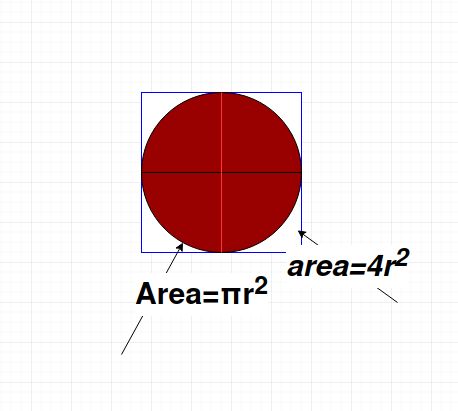

> **Monte carlo method**: Let $(X_{n})_{n≥1}$ be a sequence of independent and uniform random variables on the $[0,1]^{2}$ block. The area of this block is A=4(if r=1)

>The probability that $X_{i}$ falls into the disk is $p=\frac{\pi}{4}$


> We know that:$$ A_{sq}=4r^{2} \qquad  A_{cr}=\pi r^{2}$$
> So : $$  \pi = 4 \frac{A_{cr}}{A_{sq}}= 4 \frac{N_{cr}}{N_{sq}}$$
>Which :

>$N_{cr}:$ Number of dots in cercle. 

>$ N_{sq}$:Number of dots in square. 





In [4]:

def monte_carlo(N):
    x=np.random.random(size=N)
    y=np.random.random(size=N)
    r=x**2+y**2
    mc=np.asarray([( r[i]<1  ) for i in range(N)])
    res=4*np.sum(mc)/N
    return res 
        
        

In [34]:
monte_carlo(10000)

3.1164

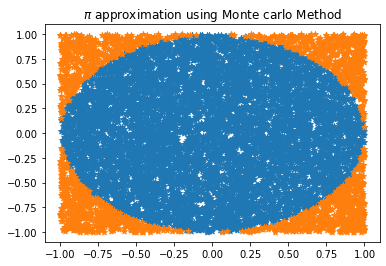

In [12]:
import  matplotlib.pyplot as plt
N=10000
x=2*np.random.random(size=N)-1
y=2*np.random.random(size=N) -1
r=x**2+y**2
b=r<=1
c=r>1
plt.scatter(x[b], y[b], marker='*')
plt.scatter(x[c], y[c], marker='*')
plt.title(r"$\pi$ approximation using Monte carlo Method")

plt.show()

In [7]:
@njit(parallel=True,fastmath=True)
def monte_carlo1(N):
    Ncir=0
    for i in prange(N):
        x=np.random.random(size=N)
        y=np.random.random(size=N)
        if x[i]**2+y[i]**2<1: 
            Ncir+=1     
    res=4.0*Ncir/float(N)
    return res 
        

In [8]:
monte_carlo1(100000)

3.14536

In [25]:
%timeit monte_carlo1(100000)

54.7 s ± 3.41 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


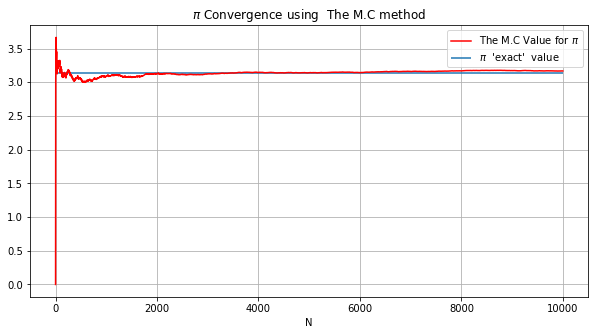

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
cum = 4*np.cumsum(b)/(np.arange(N)+1)
plt.plot(cum,'-r', label=r'The M.C Value for $\pi$')
plt.hlines(np.pi, 0, N, label=r"$\pi$  'exact'  value ")
ax.set(title=r"$\pi$ Convergence using  The M.C method",
      xlabel='N')
plt.grid(True)
plt.legend();

# $ \color{red}{\textbf{ Now we use parallel computing  to calculate $\pi$ }}$

In [ ]:
# to execute this code run in your terminal
#mpirun -n (number of processor) python code_name.py 
#for example mpirun -n 2 python3 mc_pi.py
import random
from mpi4py import MPI
import numpy as np

COMM = MPI.COMM_WORLD
RANK = COMM.Get_rank()

print (RANK, 'uses seed', RANK)
random.seed(RANK)

N = 10**12 # N = 10**7 , N = 10**8
k = 0
for i in range(0, N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    if x**2 + y**2 <= 1:
        k = k + 1
R = float(k)/N

print (RANK, 'computes', R)

if(RANK == 1):
    COMM.send(R, dest=0, tag=11)
    print (RANK, 'sends', R, 'to 0')
elif(RANK == 0):
    S = COMM.recv(source=1, tag=11)
    print (RANK, 'received', S, 'from 1')
    RESULT = 2*(R + S)
    print ('approximation for pi =', RESULT)
    print('exact pi=', np.pi)
    print('error=',np.pi-RESULT)

# $ \color{red}{\textbf{ Another Method }}$

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  4 14:10:51 2021

@author: babou
"""
from mpi4py import MPI
from math import pi ,pow

def s(n):
  sn=0.
  for k in range(n):
        sn+=4*((-1)**k)/(2*k +1) 
  return sn
COMM = MPI.COMM_WORLD
RANK = COMM.Get_rank()
nproc= COMM.Get_size()


if(RANK == 0):
   n=10**8
else:
   n=None
n=COMM.bcast(n, root=0)
pi_app=s(n)/2
R=COMM.reduce(pi_app , op=MPI.SUM, root=0)
if RANK==0:
    print ('approximation for pi=  %.25f' % (R))
    print('exact pi=  %.25f' % (pi))
    print('error= %.25f'% (abs(pi-R)))
 

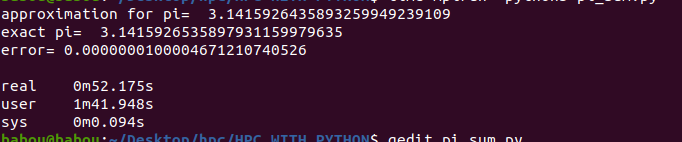